In [46]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import re
import math
import statistics
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 8)
f = open("C:\\Users\\Bonilapa\\Desktop\\case1.txt", "r")
a = f.read()
t = re.split(',|\n', a)

Populating the interactive namespace from numpy and matplotlib


C:\Users\Bonilapa\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [47]:
#function to check string value on float
def is_float(value):
    try:
        float(value)
        return True
    except:
        return False

In [48]:
#values to measure index put into separate list
x_index = []
for i in range(0, len(t), 2):
    if(is_float(t[i])):
        x_index.append(float(t[i]))

In [49]:
#extract values into separate list
x_data = []
for i in range(1, len(t), 2):
    if(is_float(t[i])):
        x_data.append(float(t[i]))

In [50]:
#check data list to type mistakes
for i in range(len(x_data)):
    if not is_float(x_data[i]):
        print(i, x_data[i],'\n')

Text(0,0.5,'x_data')

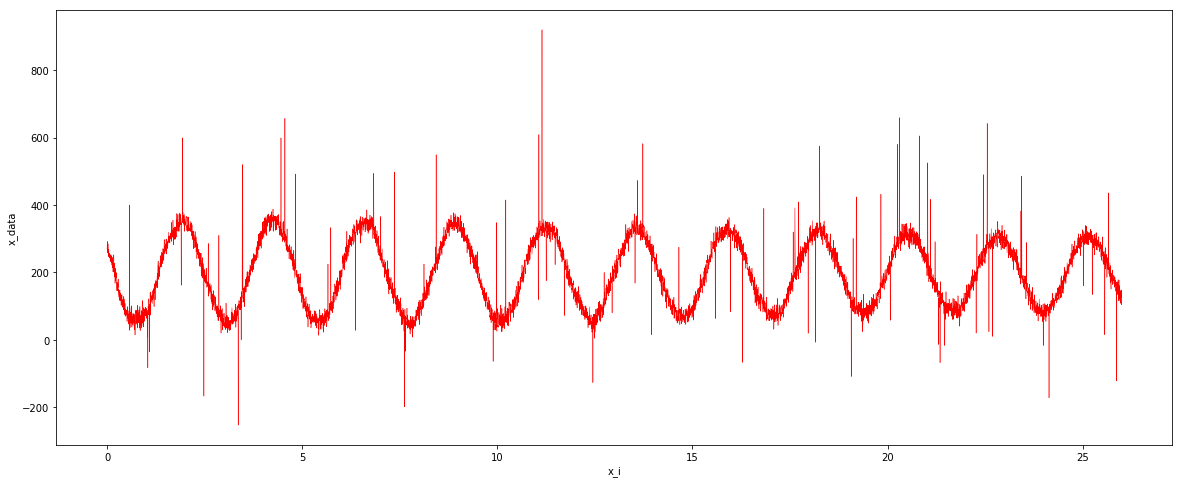

In [52]:
#plot
plt.figure()
plt.plot(x_index, x_data, c = 'red', label="pred", linewidth=0.5)
plt.xlabel("x_i")
plt.ylabel("x_data")



In [72]:
xOpt =[]
Kstab = 0.13
xOpt.append(x_data[0])
for i in range(1, len(x_data)):
    xOpt.append(Kstab * x_data[i] + (1 - Kstab) * xOpt[i-1])

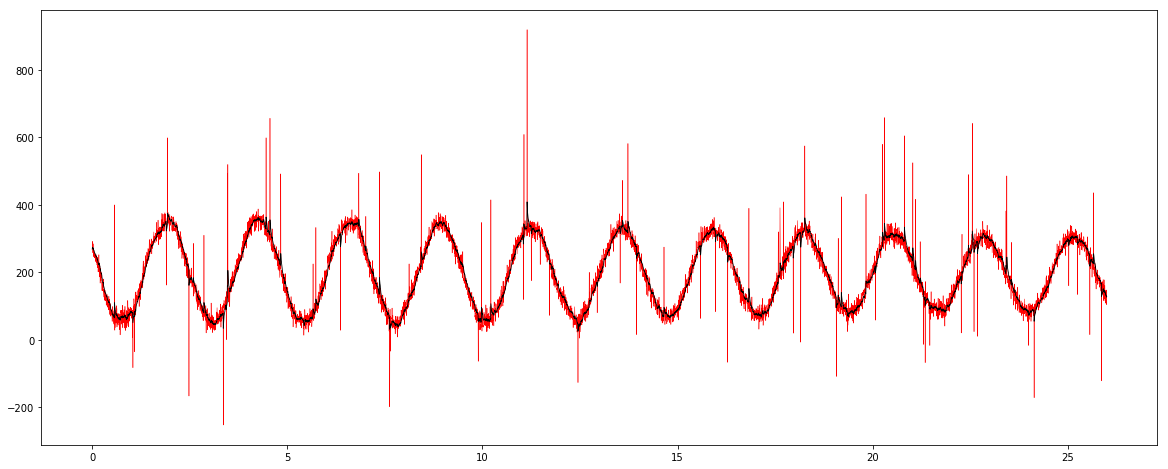

In [73]:
#common plot to check correlation level with original motion function 
plt.plot(x_index, x_data, c = 'red', label="pred", linewidth=0.5)
plt.plot(x_index, xOpt, c='black', label="pred", linewidth=0.8)

In [43]:

f.close

<function TextIOWrapper.close()>

In [44]:
statistics.mean(x_data)

197.9183074

In [38]:
#attemts to use covarience or correlation
xOpt =[]
xOpt = x_data
coefs = []
for i in np.arange(0.0, 1.0, 0.01):
    Kstab = i
    xOpt1 = []
    xOpt1.append(xOpt[0])
    for i in range(1, len(x_data)):
        xOpt1.append(Kstab * x_data[i] + (1 - Kstab) * xOpt1[i-1])
    coefs.append(np.cov(xOpt1, x_data))
for i in coefs:
    print(i[0][1])
'''it = []
for i in range(len(coefs)):
    it.append(i)
plt.plot(coefs, it, c = 'red', linewidth=0.5)'''

0.0
4155.559214997024
6962.220394382707
7960.597828786706
8386.338702260527
8603.736507367685
8730.637996924328
8812.577843235298
8869.841682605736
8912.501226347556
8945.993423431843
8973.45379037352
8996.789694188998
9017.213473090389
9035.524506763586
9052.26653875668
9067.819431484928
9082.45477195988
9096.370709351193
9109.714425248418
9122.597003383657
9135.10349600312
9147.29987807936
9159.23793956903
9170.958783766217
9182.495366067405
9193.874361154642
9205.117553062091
9216.242881617862
9227.265238294107
9238.197077209588
9249.048888340863
9259.82956702112
9270.54670467591
9281.206819245042
9291.815539059804
9302.377750540774
9312.897717581262
9323.379178628857
9333.825426093566
9344.239371668833
9354.623600361418
9364.980415422757
9375.311875910624
9385.619828251743
9395.90593289721
9406.17168694496
9416.418443432389
9426.647427867354
9436.859752458431
9447.05642842026
9457.238376661242
9467.406437106214
9477.561376862146
9487.703897399344
9497.8346408911
9507.954195831191
9

"it = []\nfor i in range(len(coefs)):\n    it.append(i)\nplt.plot(coefs, it, c = 'red', linewidth=0.5)"

In [22]:
np.corrcoef(xOpt1, x_data)

array([[1.        , 0.96253872],
       [0.96253872, 1.        ]])

In [21]:
np.cov(xOpt1, x_data)[0][1]

9122.597003383657

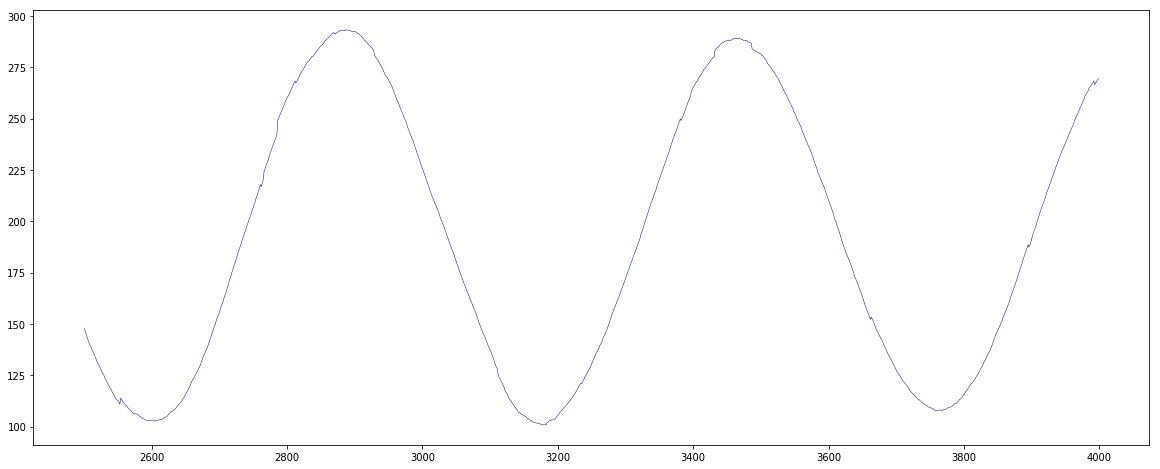

In [53]:
xNew = []
xIndex = []
for i in range(2500,4000):
    xNew.append(xOpt1[i])
    xIndex.append(i)
plt.plot(xIndex, xNew, c = 'blue', label="pred", linewidth=0.5)